# Homework : 8 Machine Learning - 1 (Supervised Methods)

## 3] (d) MDA (using LDA as an approximation to MDA).

### Importing the necessary libraries.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.decomposition import PCA as sklearnPCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

from utils.helper import Engine


### Instantiate an object for the Engine Class

In [2]:
engine = Engine()

### Loading the UCI Wine Dataset using Pandas.

In [3]:
import pandas as pd

# Define the column names
columnNames = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium',
           'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
           'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']

# Load the Wine dataset from the UCI repository
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wineData = pd.read_csv(url, header=None, names=columnNames)

wineData

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Exploratory Data-Analysis on the UCI Wine Dataset.

In [4]:
engine.performDataAnalysis(wineData)

$$ DATA ANALYSIS OF THE UCI WINE DATAS $$
-------------------------------------------------------------------
Shape of X_train: (178, 13)
Number of Features in the Training Data: 13
Number of Data-Points in the Training Data: 178
Number of classes in Y_train is: 3
{'Barolo wine - 1': 1, 'Grignolino wine - 2': 2, 'Barbera wine - 3': 3}
-------------------------------------------------------------------


### Generating the Train Data from the Pandas Dataframe and Standardizing the X_train.

In [5]:
n_train, X_train, Y_train = engine.generateTrainData(wineData)
X_train_std = engine.standardizeData(X_train)

Generated the Train Data!
Standardized the Train Data!


# You can use sklearn.discriminant_analysis.LinearDiscriminantAnalysis on the entire dataset to reduce the dimensionality to 2. Plot the data projected into the 2D space, using the same symbols as in part (a) to denote the class label of each data point.
# For this part, first standardize the data.

## How do you expect a linear classifier to do on this data compared with (b) and (a) above?

In [6]:
X_train_LDA = engine.transformTrainData_LDA(X_train_std, Y_train)


### Plot the data projected into the 2D space, using the same symbols as in part (a) to denote the class label of each data point.

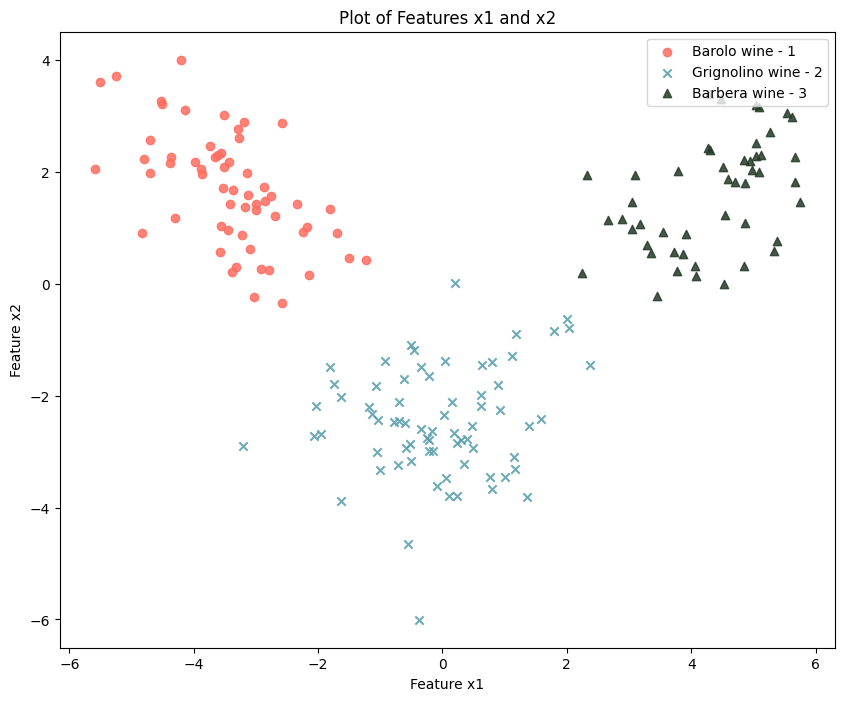

In [7]:
engine.plotScatterData(X_train_LDA[:, 0].reshape(n_train, 1), X_train_LDA[:, 1].reshape(n_train, 1), Y_train, position="upper right")

## (ii) Repeat (a)(ii) except for the 2 new features resulting from MDA/LDA (plot everything in the new (x1, x2) space).

In [8]:
run_min, run_max, model_min_CER, model_max_CER = engine.train_MCP(n_train, X_train_LDA[:, 0], X_train_LDA[:, 1], Y_train, runs=5)

-----------------------------------------------------------------------------------------------------------------------------------
The Mean Classification Error Rate from each cross-val run are: {1: 0.0, 2: 0.005555555555555558, 3: 0.011111111111111117, 4: 0.005555555555555558, 5: 0.0}
The Average of the Mean Classification Error Rate over the 5 runs is: 0.004444444444444447
The Standard Deviation of the Mean Classification Error Rate over the 5 runs is: 0.004157397096415493
The Lowest Mean Classification Error Rate -> 0.0 was achieved at run: 1
The Higesh Mean Classification Error Rate -> 0.011111111111111117 was achieved at run: 3
-----------------------------------------------------------------------------------------------------------------------------------


## Plot the labelled data points of the entire dataset, decision boundaries and regions based on the stored weights resulting from the first fold for the Model with Minimum Classification Error Rate

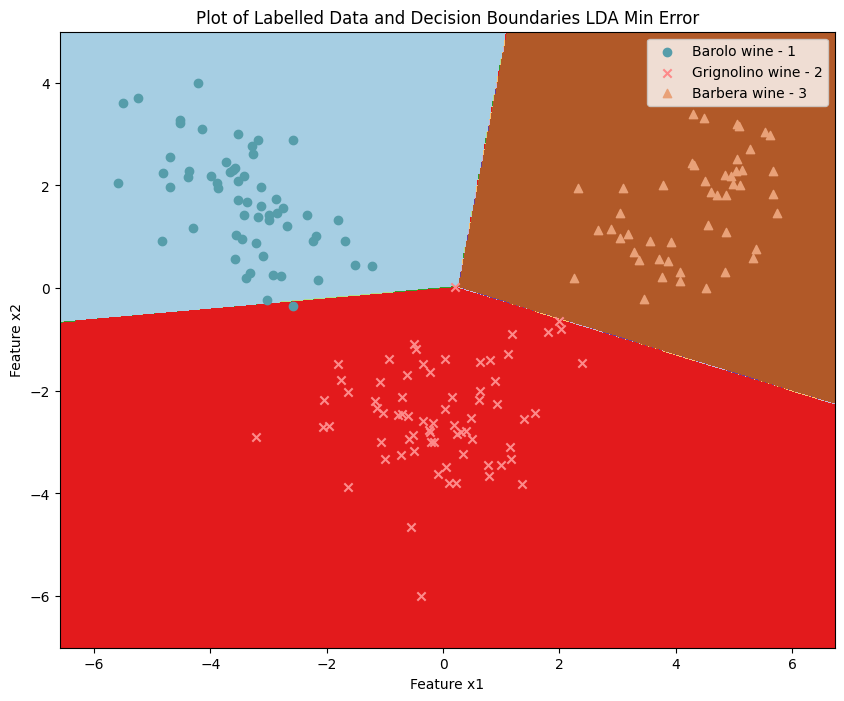

In [9]:
engine.plotDecisionBoundary_MCP(X_train_LDA[:, 0], X_train_LDA[:, 1], Y_train, model_min_CER, "Plot of Labelled Data and Decision Boundaries LDA Min Error", position="upper right", h = 0.02)

## Plot the labelled data points of the entire dataset, decision boundaries and regions based on the stored weights resulting from the first fold for the Model with Maximum Classification Error Rate

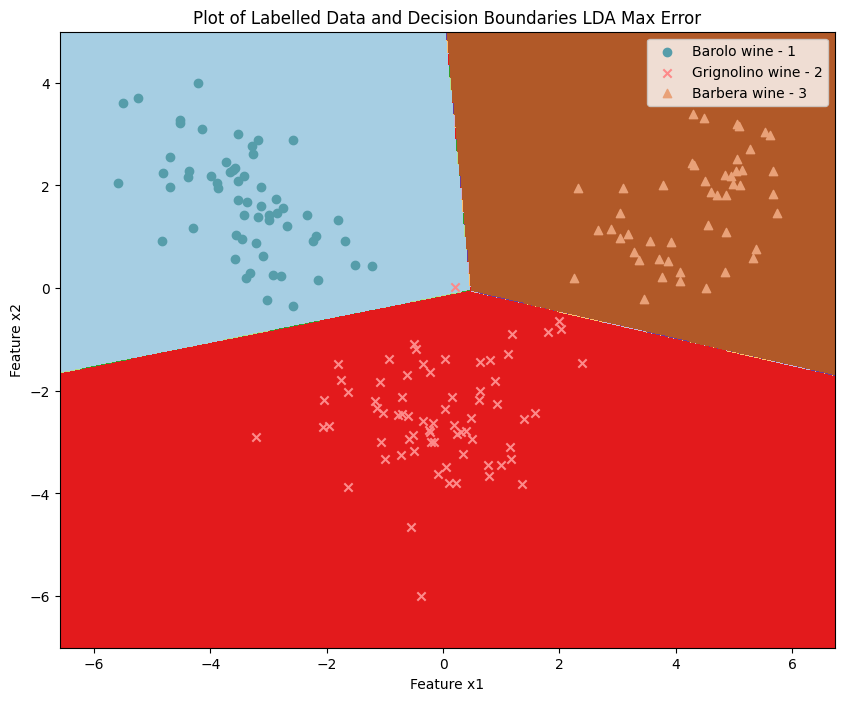

In [10]:
engine.plotDecisionBoundary_MCP(X_train_LDA[:, 0], X_train_LDA[:, 1], Y_train, model_max_CER, "Plot of Labelled Data and Decision Boundaries LDA Max Error", position="upper right", h = 0.02)

## 3] (D) (iii) (iii) How does it compare with the baselines in (a)(ii) and PCA in (b)(ii)?